In [2]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Merged_DatasetV2.csv')

C:\Users\Vashist\AppData\Local\Temp\ipykernel_3912\4258154512.py:1: DtypeWarning: Columns (7,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Merged_DatasetV2.csv')


In [3]:
df

,Unnamed: 0,id,type,type-id,score,name,address,coordinates,area,life-span,...,aliases,latitude,longitude,city,state,county,country,lifespan_years,status,services_offered
0,0,f9a1fd95-4c6d-43a6-bb31-4ee8d5a44a8b,Studio,05fa6a09-ff92-3d34-bdbb-5141d3c24f38,100,Columbia (CBS) Studio ‘B’,"49 East 52nd Street, Manhattan, New York City","{'latitude': '40.759164', 'longitude': '-73.97...","{'id': '74e50e58-5deb-4b99-93a2-decbb365c07f',...",{'ended': None},...,NaN,40.759164,-73.974123,Test Restaurant,New York,NaN,US,NaN,Active,NaN
1,1,42e9fa7c-a981-44f9-943c-bf39a8c6ce8d,Venue,cd92781a-a73f-30e8-a430-55d7521338db,100,New Theatre Oxford,"George St, Oxford OX1 2AG","{'latitude': '51.753951', 'longitude': '-1.260...","{'id': '33587495-c775-4483-b819-931c4cf438cd',...",{'ended': None},...,NaN,51.753951,-1.260011,Victoria House Hotel,England,Oxfordshire,GB,NaN,Active,NaN
2,2,34e7351d-715d-4b20-a5d6-3c0bd717eb1d,Religious building,a120ca4a-69e9-3c0e-bc09-21cae26eb621,100,Santuario della Beata Vergine di Ariadello,NaN,"{'latitude': '45.316087', 'longitude': '9.8651...","{'id': '686e7b1e-613f-419c-bcc1-1e84df36586a',...","{'begin': '1666', 'ended': None}",...,NaN,45.316087,9.865165,Genivolta,NaN,NaN,IT,359.0,Active,NaN
3,3,0ad32768-514b-410f-9d5a-40ebb0c3373c,Studio,05fa6a09-ff92-3d34-bdbb-5141d3c24f38,100,ROKU-st,〒106-0032 東京都港区六本木 3-4-24 六本木足立ビルB1F,"{'latitude': '35.664122', 'longitude': '139.72...","{'id': 'd9fd27ac-b36f-492b-b598-039ee0dd08c1',...",{'ended': None},...,"[{'sort-name': 'Roku Studio', 'type-id': 'fb68...",35.664122,139.729426,Tenso Jinja,NaN,NaN,JP,NaN,Active,NaN
4,4,0b050655-48da-4be7-b5de-7a3ee7370b9e,Venue,cd92781a-a73f-30e8-a430-55d7521338db,100,Rätschenmühle,"Schlachthausstraße 22, 73312 Geislingen/Steige","{'latitude': '48.627518', 'longitude': '9.8256...","{'id': '4518c94c-b6ee-40d0-b4b6-fc27b06fa011',...",{'ended': None},...,NaN,48.627518,9.825691,Geislingen an der Steige,NaN,NaN,DE,NaN,Active,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69658,69658,8f544074-fecb-49af-a761-c6e8b35d8486,Studio,05fa6a09-ff92-3d34-bdbb-5141d3c24f38,100,Full and Empty,NaN,NaN,"{'id': '29a709d8-0320-493e-8d0c-f2c386662b7f',...",{'ended': None},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active,recorded at
69659,69659,90f30083-88db-49a7-8ec1-06d9ca2aa065,Venue,cd92781a-a73f-30e8-a430-55d7521338db,100,Plama,NaN,NaN,"{'id': '70cd6f66-9881-4105-8096-8721a1887aad',...",{'ended': None},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active,recorded at
69660,69660,6b94062e-78a3-46e8-b861-d801dfe27376,Studio,05fa6a09-ff92-3d34-bdbb-5141d3c24f38,100,Studio Toupie,NaN,NaN,NaN,{'ended': None},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active,NaN
69661,69661,f7362574-05ac-4c21-8196-26a09d6e5fe7,Studio,05fa6a09-ff92-3d34-bdbb-5141d3c24f38,100,FatCat Studio,NaN,NaN,NaN,{'ended': None},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active,NaN


In [4]:
df['services_offered'].value_counts(dropna=False)

services_offered
NaN                                                                                    52687
recorded at                                                                            11508
mixed at                                                                                3293
engineered at                                                                           1124
edited at                                                                                268
produced at                                                                              251
recorded at, premiere                                                                    124
video shot at                                                                            104
premiere                                                                                  91
arranged at_recording                                                                     52
remixed at                                           

In [5]:
df['services_offered'] = df['services_offered'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

In [6]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

services_encoded = mlb.fit_transform(df['services_offered'])

In [7]:
services_df = pd.DataFrame(services_encoded, columns=mlb.classes_)

In [8]:
df = df.drop(columns=['services_offered'])

In [9]:
df = pd.concat([df, services_df], axis=1)

In [10]:
df

,Unnamed: 0,id,type,type-id,score,name,address,coordinates,area,life-span,...,engineered at,lyrics written at,mixed at,premiere,produced at,recorded at,remixed at,revised at,video shot at,written at
0,0,f9a1fd95-4c6d-43a6-bb31-4ee8d5a44a8b,Studio,05fa6a09-ff92-3d34-bdbb-5141d3c24f38,100,Columbia (CBS) Studio ‘B’,"49 East 52nd Street, Manhattan, New York City","{'latitude': '40.759164', 'longitude': '-73.97...","{'id': '74e50e58-5deb-4b99-93a2-decbb365c07f',...",{'ended': None},...,0,0,0,0,0,0,0,0,0,0
1,1,42e9fa7c-a981-44f9-943c-bf39a8c6ce8d,Venue,cd92781a-a73f-30e8-a430-55d7521338db,100,New Theatre Oxford,"George St, Oxford OX1 2AG","{'latitude': '51.753951', 'longitude': '-1.260...","{'id': '33587495-c775-4483-b819-931c4cf438cd',...",{'ended': None},...,0,0,0,0,0,0,0,0,0,0
2,2,34e7351d-715d-4b20-a5d6-3c0bd717eb1d,Religious building,a120ca4a-69e9-3c0e-bc09-21cae26eb621,100,Santuario della Beata Vergine di Ariadello,NaN,"{'latitude': '45.316087', 'longitude': '9.8651...","{'id': '686e7b1e-613f-419c-bcc1-1e84df36586a',...","{'begin': '1666', 'ended': None}",...,0,0,0,0,0,0,0,0,0,0
3,3,0ad32768-514b-410f-9d5a-40ebb0c3373c,Studio,05fa6a09-ff92-3d34-bdbb-5141d3c24f38,100,ROKU-st,〒106-0032 東京都港区六本木 3-4-24 六本木足立ビルB1F,"{'latitude': '35.664122', 'longitude': '139.72...","{'id': 'd9fd27ac-b36f-492b-b598-039ee0dd08c1',...",{'ended': None},...,0,0,0,0,0,0,0,0,0,0
4,4,0b050655-48da-4be7-b5de-7a3ee7370b9e,Venue,cd92781a-a73f-30e8-a430-55d7521338db,100,Rätschenmühle,"Schlachthausstraße 22, 73312 Geislingen/Steige","{'latitude': '48.627518', 'longitude': '9.8256...","{'id': '4518c94c-b6ee-40d0-b4b6-fc27b06fa011',...",{'ended': None},...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69658,69658,8f544074-fecb-49af-a761-c6e8b35d8486,Studio,05fa6a09-ff92-3d34-bdbb-5141d3c24f38,100,Full and Empty,NaN,NaN,"{'id': '29a709d8-0320-493e-8d0c-f2c386662b7f',...",{'ended': None},...,0,0,0,0,0,1,0,0,0,0
69659,69659,90f30083-88db-49a7-8ec1-06d9ca2aa065,Venue,cd92781a-a73f-30e8-a430-55d7521338db,100,Plama,NaN,NaN,"{'id': '70cd6f66-9881-4105-8096-8721a1887aad',...",{'ended': None},...,0,0,0,0,0,1,0,0,0,0
69660,69660,6b94062e-78a3-46e8-b861-d801dfe27376,Studio,05fa6a09-ff92-3d34-bdbb-5141d3c24f38,100,Studio Toupie,NaN,NaN,NaN,{'ended': None},...,0,0,0,0,0,0,0,0,0,0
69661,69661,f7362574-05ac-4c21-8196-26a09d6e5fe7,Studio,05fa6a09-ff92-3d34-bdbb-5141d3c24f38,100,FatCat Studio,NaN,NaN,NaN,{'ended': None},...,0,0,0,0,0,0,0,0,0,0


In [11]:
drop_cols = ['Unnamed: 0', 'id', 'name', 'address', 'coordinates', 'area', 'life-span', 'disambiguation', 'aliases']
df = df.drop(columns=drop_cols)

In [12]:
target_columns = services_df.columns
X = df.drop(columns=target_columns)
y = df[target_columns]

In [13]:
categorical_cols = ['type', 'state', 'status', 'country']
numerical_cols = ['score', 'latitude', 'longitude', 'lifespan_years']

In [14]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy="median")
X[numerical_cols] = num_imputer.fit_transform(X[numerical_cols])

In [15]:
cat_imputer = SimpleImputer(strategy="most_frequent")
X[categorical_cols] = cat_imputer.fit_transform(X[categorical_cols])

In [3]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import jaccard_score

In [17]:
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X[categorical_cols] = ordinal_encoder.fit_transform(X[categorical_cols])

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_cols])
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_cols)

In [19]:
X_final = pd.concat([X[categorical_cols], X_scaled_df], axis=1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)


In [21]:
nb_model = MultiOutputClassifier(BernoulliNB())
nb_model.fit(X_train, y_train)

ValueError: Input X contains NaN.
BernoulliNB does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [121]:
y_pred = nb_model.predict(X_test)

In [122]:
jaccard = jaccard_score(y_test, y_pred, average='samples', zero_division=1)
print(f"Jaccard Similarity Score: {jaccard:.4f}")

Jaccard Similarity Score: 0.7555


ABLATION TESTING (REMOVING IMPUTATION)

In [29]:
df = pd.read_csv('Merged_DatasetV2.csv')

# Convert 'services_offered' into a list of services
df['services_offered'] = df['services_offered'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

mlb = MultiLabelBinarizer()
services_encoded = mlb.fit_transform(df['services_offered'])
services_df = pd.DataFrame(services_encoded, columns=mlb.classes_)

df = df.drop(columns=['services_offered'])
df = pd.concat([df, services_df], axis=1)

drop_cols = ['Unnamed: 0', 'id', 'name', 'address', 'coordinates', 'area', 'life-span', 'disambiguation', 'aliases']
df = df.drop(columns=drop_cols)

target_columns = services_df.columns
X = df.drop(columns=target_columns)
y = df[target_columns]

categorical_cols = ['type', 'state', 'status']
numerical_cols = ['score', 'latitude', 'longitude', 'lifespan_years']

C:\Users\Vashist\AppData\Local\Temp\ipykernel_3912\1489900571.py:1: DtypeWarning: Columns (7,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Merged_DatasetV2.csv')


In [30]:
# Remove rows where 'services_offered' is completely empty
non_empty_samples = y.sum(axis=1) > 0
X_filtered = X.loc[non_empty_samples].copy()
y_filtered = y.loc[non_empty_samples].copy()

In [31]:
# Convert categorical features to numeric using Ordinal Encoding
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_filtered[categorical_cols] = ordinal_encoder.fit_transform(X_filtered[categorical_cols])

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered[numerical_cols])
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_cols, index=X_filtered.index)  # Ensure index alignment

# Combine categorical and numerical features
X_final = pd.concat([X_filtered[categorical_cols], X_scaled_df], axis=1)

# Drop any rows with remaining NaN values
X_final.dropna(inplace=True)
y_filtered = y_filtered.loc[X_final.index]

In [32]:
# Check alignment
assert X_final.shape[0] == y_filtered.shape[0], "Mismatch between feature and label samples!"

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_final, y_filtered, test_size=0.2, random_state=42)

# Train model
nb_model = MultiOutputClassifier(BernoulliNB())
nb_model.fit(X_train, y_train)


MultiOutputClassifier(estimator=BernoulliNB())

In [33]:
y_pred = nb_model.predict(X_test)
jaccard = jaccard_score(y_test, y_pred, average='samples')
jaccard_scores = jaccard_score(y_test, y_pred, average=None)
print(f"Jaccard Similarity Score (Without Imputation): {jaccard:.4f}")

Jaccard Similarity Score (Without Imputation): 0.8022


C:\Users\Vashist\PycharmProjects\Portfolio Projects\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


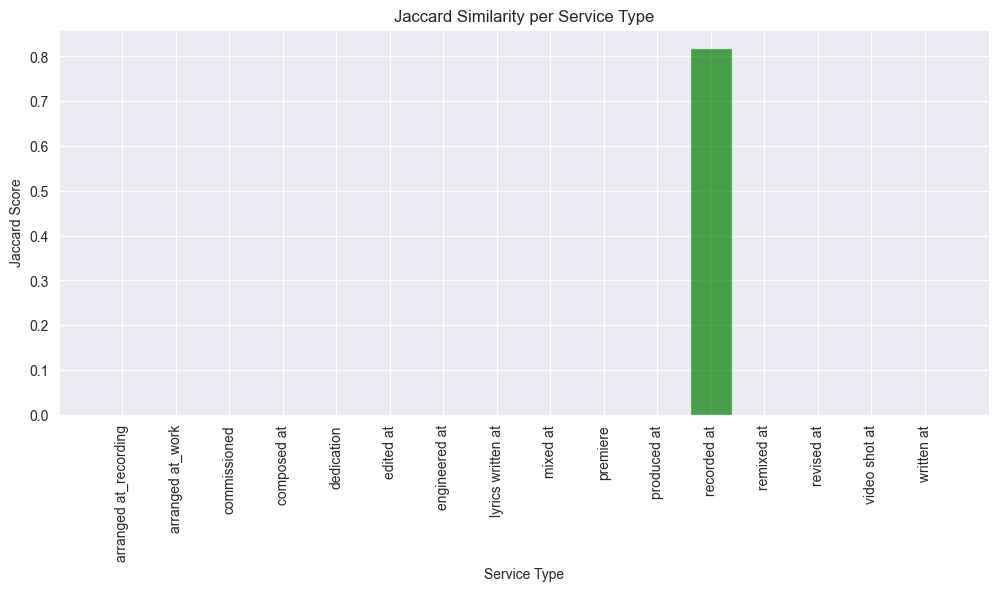

In [35]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12, 5))
plt.bar(mlb.classes_, jaccard_scores, color='green', alpha=0.7)
plt.xticks(rotation=90)
plt.xlabel('Service Type')
plt.ylabel('Jaccard Score')
plt.title('Jaccard Similarity per Service Type')
plt.show()

MORE ABLATION TESTING (TRYING OTHER NAIVE BAYES MODELS)

In [76]:
df = pd.read_csv('Merged_DatasetV2.csv')

# Convert 'services_offered' into a list of services
df['services_offered'] = df['services_offered'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

mlb = MultiLabelBinarizer()
services_encoded = mlb.fit_transform(df['services_offered'])
services_df = pd.DataFrame(services_encoded, columns=mlb.classes_)

df = df.drop(columns=['services_offered'])
df = pd.concat([df, services_df], axis=1)

drop_cols = ['Unnamed: 0', 'id', 'name', 'address', 'coordinates', 'area', 'life-span', 'disambiguation', 'aliases']
df = df.drop(columns=drop_cols)

target_columns = services_df.columns
X = df.drop(columns=target_columns)
y = df[target_columns]

categorical_cols = ['type', 'state', 'country', 'city', 'status']
numerical_cols = ['score', 'lifespan_years']

In [77]:
# Remove rows where 'services_offered' is completely empty
non_empty_samples = y.sum(axis=1) > 0
X_filtered = X.loc[non_empty_samples].copy()
y_filtered = y.loc[non_empty_samples].copy()

In [78]:
# Convert categorical features to numeric using Ordinal Encoding
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_filtered[categorical_cols] = ordinal_encoder.fit_transform(X_filtered[categorical_cols])

from sklearn.preprocessing import MinMaxScaler
# Standardize numerical features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_filtered[numerical_cols])
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_cols, index=X_filtered.index)

# Combine categorical and numerical features
X_final = pd.concat([X_filtered[categorical_cols], X_scaled_df], axis=1)

# Drop any rows with remaining NaN values
X_final.dropna(inplace=True)
y_filtered = y_filtered.loc[X_final.index]

In [82]:
from sklearn.naive_bayes import GaussianNB

assert X_final.shape[0] == y_filtered.shape[0], "Mismatch between feature and label samples!"

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_final, y_filtered, test_size=0.2, random_state=42)

# Train model
nb_model = MultiOutputClassifier(GaussianNB())
nb_model.fit(X_train, y_train)

MultiOutputClassifier(estimator=GaussianNB())

In [84]:
y_pred = nb_model.predict(X_test)
jaccard = jaccard_score(y_test, y_pred, average='samples')
jaccard_scores = jaccard_score(y_test, y_pred, average=None)
print(f"Jaccard Similarity Score: {jaccard:.4f}")

Jaccard Similarity Score: 0.7143


TRYING COMPLEMENTNB

In [85]:
nb_model = MultiOutputClassifier(ComplementNB(alpha=1.5))
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)
jaccard = jaccard_score(y_test, y_pred, average='samples')
jaccard_scores = jaccard_score(y_test, y_pred, average=None)
print(f"Jaccard Similarity Score: {jaccard:.4f}")

Jaccard Similarity Score: 0.1440


FINAL IMPLEMENTATION

In [3]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import jaccard_score
from sklearn.preprocessing import MultiLabelBinarizer, OrdinalEncoder, StandardScaler
df = pd.read_csv('Merged_DatasetV2.csv')

# Convert 'services_offered' into a list of services
df['services_offered'] = df['services_offered'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

mlb = MultiLabelBinarizer()
services_encoded = mlb.fit_transform(df['services_offered'])
services_df = pd.DataFrame(services_encoded, columns=mlb.classes_)

df = df.drop(columns=['services_offered'])
df = pd.concat([df, services_df], axis=1)

drop_cols = ['Unnamed: 0', 'id', 'name', 'address', 'coordinates', 'area', 'life-span', 'disambiguation', 'aliases']
df = df.drop(columns=drop_cols)

target_columns = services_df.columns
X = df.drop(columns=target_columns)
y = df[target_columns]

categorical_cols = ['type', 'state', 'status']
numerical_cols = ['score', 'latitude', 'longitude', 'lifespan_years']

# Remove rows where 'services_offered' is completely empty
non_empty_samples = y.sum(axis=1) > 0
X_filtered = X.loc[non_empty_samples].copy()
y_filtered = y.loc[non_empty_samples].copy()

# Convert categorical features to numeric using Ordinal Encoding
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_filtered[categorical_cols] = ordinal_encoder.fit_transform(X_filtered[categorical_cols])

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered[numerical_cols])
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_cols, index=X_filtered.index)  # Ensure index alignment

# Combine categorical and numerical features
X_final = pd.concat([X_filtered[categorical_cols], X_scaled_df], axis=1)

# Drop any rows with remaining NaN values
X_final.dropna(inplace=True)
y_filtered = y_filtered.loc[X_final.index]

# Check alignment
assert X_final.shape[0] == y_filtered.shape[0], "Mismatch between feature and label samples!"

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_final, y_filtered, test_size=0.2, random_state=42)

# Train model
nb_model = MultiOutputClassifier(BernoulliNB())
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)
jaccard = jaccard_score(y_test, y_pred, average='samples')
jaccard_scores = jaccard_score(y_test, y_pred, average=None)
print(f"Jaccard Similarity Score (Without Imputation): {jaccard:.4f}")

C:\Users\Vashist\AppData\Local\Temp\ipykernel_10448\3886024061.py:8: DtypeWarning: Columns (7,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Merged_DatasetV2.csv')


Jaccard Similarity Score (Without Imputation): 0.8022


C:\Users\Vashist\PycharmProjects\Portfolio Projects\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


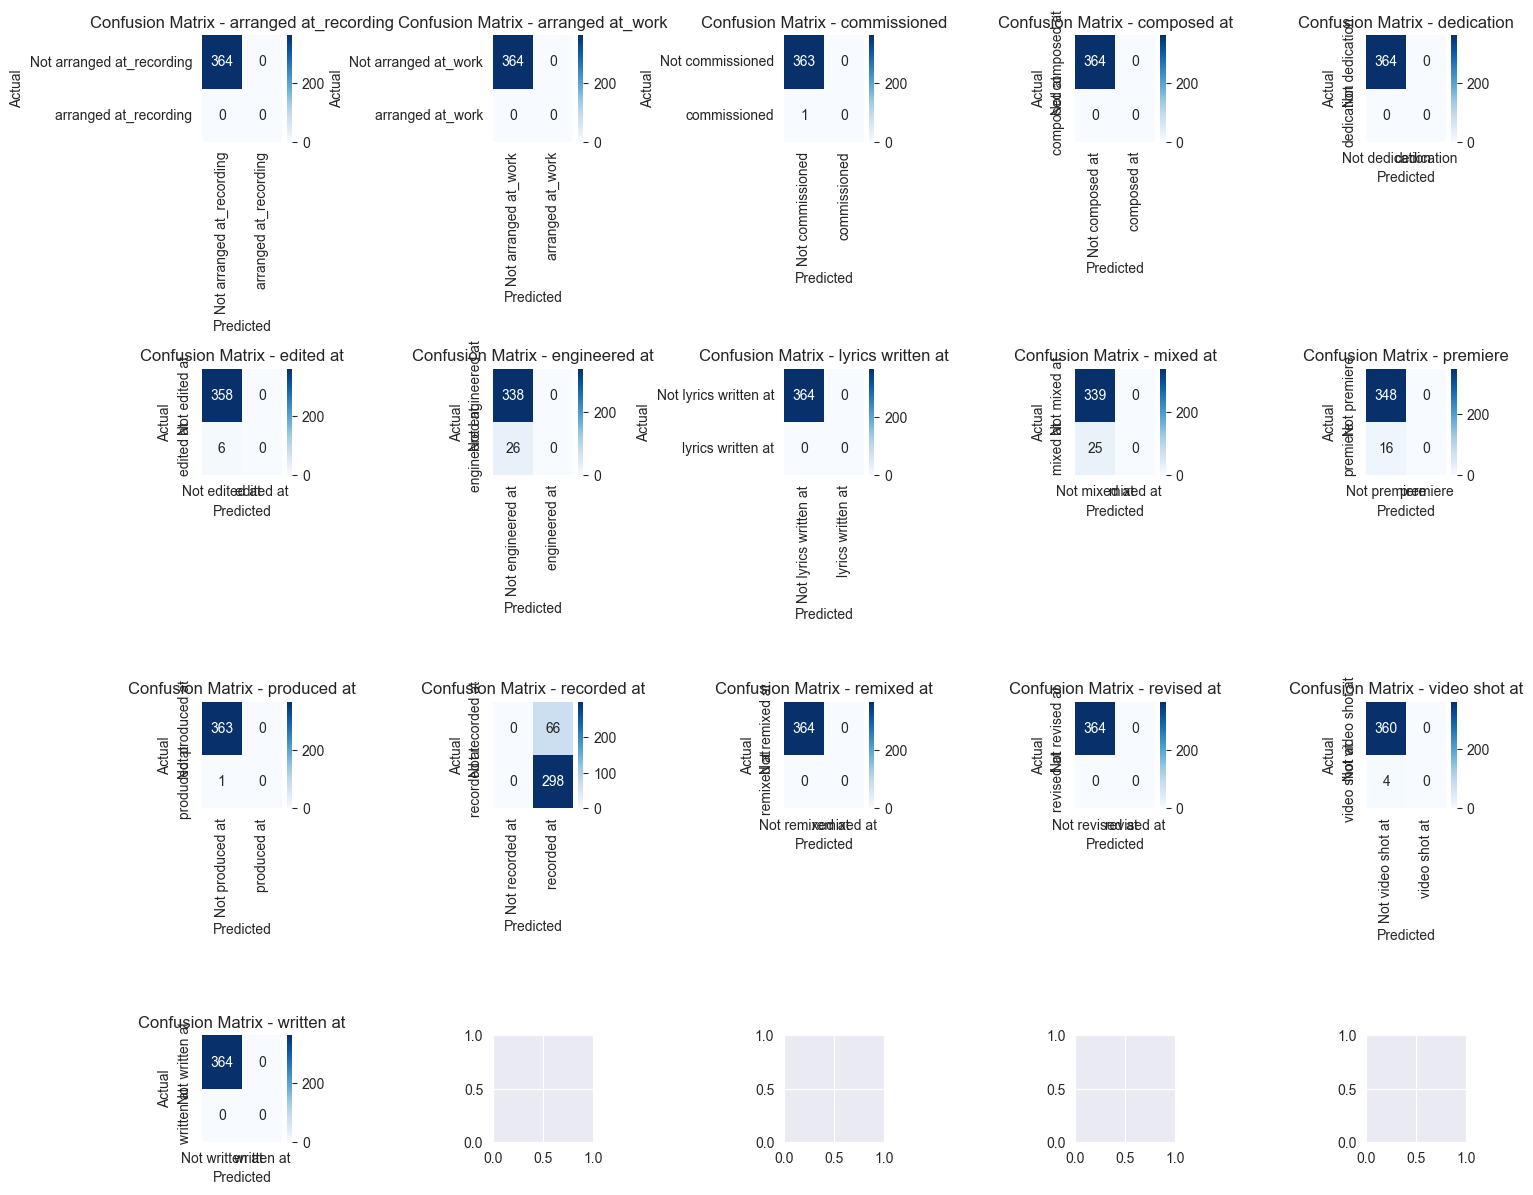

In [4]:
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt

# Compute the confusion matrix for each label
conf_matrices = multilabel_confusion_matrix(y_test, y_pred)

# Get label names
labels = mlb.classes_

# Plot confusion matrices for each label
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 12))
axes = axes.flatten()

for i, label in enumerate(labels):
    cm = conf_matrices[i]

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not " + label, label], yticklabels=["Not " + label, label], ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {label}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

# Adjust layout
plt.tight_layout()
plt.show()

In [8]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred, target_names=mlb.classes_, zero_division=0, output_dict=True)

class_report_df = pd.DataFrame(class_report).transpose()

print("\n🔹 Multi-Label Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=mlb.classes_, zero_division=0))


🔹 Multi-Label Classification Report:

                       precision    recall  f1-score   support

arranged at_recording       0.00      0.00      0.00         0
     arranged at_work       0.00      0.00      0.00         0
         commissioned       0.00      0.00      0.00         1
          composed at       0.00      0.00      0.00         0
           dedication       0.00      0.00      0.00         0
            edited at       0.00      0.00      0.00         6
        engineered at       0.00      0.00      0.00        26
    lyrics written at       0.00      0.00      0.00         0
             mixed at       0.00      0.00      0.00        25
             premiere       0.00      0.00      0.00        16
          produced at       0.00      0.00      0.00         1
          recorded at       0.82      1.00      0.90       298
           remixed at       0.00      0.00      0.00         0
           revised at       0.00      0.00      0.00         0
        video s

In [5]:
class_report_data = {
    "precision": [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.82, 0.00, 0.00, 0.00, 0.00],
    "recall": [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 0.00, 0.00],
    "f1-score": [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.90, 0.00, 0.00, 0.00, 0.00],
    "support": [0, 0, 1, 0, 0, 6, 26, 0, 25, 16, 1, 298, 0, 0, 4, 0],
}

index_labels = [
    "arranged at_recording", "arranged at_work", "commissioned", "composed at",
    "dedication", "edited at", "engineered at", "lyrics written at",
    "mixed at", "premiere", "produced at", "recorded at",
    "remixed at", "revised at", "video shot at", "written at"
]

In [6]:
class_report_df = pd.DataFrame(class_report_data, index=index_labels)

std_macro_f1 = class_report_df["f1-score"].std()
print(std_macro_f1)

0.225
